Data Loading

In [21]:
import numpy as np
import torch as tr
import torch.nn as nn
import torch.optim as optimizer
import sys
import os
from matplotlib import image
import matplotlib.pyplot as plt

In [49]:
train_image_fileName_list = os.listdir("data/membrane/train/image/")
train_image_folder_path = "data/membrane/train/image/"
train_label_folder_path = "data/membrane/train/label/"

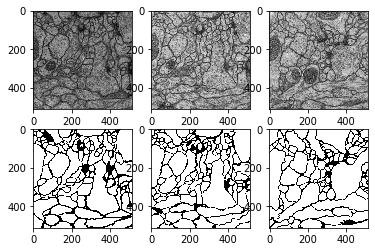

In [48]:
preview_images_list = []
preview_label_list = []
preview_number = 3
for i in range(preview_number):
    image_file_path = os.path.join(train_image_folder_path,train_image_fileName_list[i])
    label_file_path = os.path.join(train_label_folder_path,train_image_fileName_list[i])
    preview_image_data = image.imread(image_file_path)
    preview_images_list.append(preview_image_data)
    preview_label_data = image.imread(label_file_path)
    preview_label_list.append(preview_label_data)
for i in range(preview_number):
    plt.subplot(2, preview_number,i+1)
    plt.imshow(preview_images_list[i],cmap="gray")
    plt.subplot(2, preview_number,i+1+preview_number)
    plt.imshow(preview_label_list[i],cmap="gray")

In [67]:
from torch.utils.data import DataLoader,Dataset
from torchvision.transforms import CenterCrop,Compose

In [59]:
class picDataset(Dataset):
    def __init__(self, data_path, label_path,file_name_list, transform=None):
        
        self.data_path = data_path
        self.label_path = label_path
        self.file_name_list = file_name_list
        self.transform = transform
        
    def __len__(self):
        return len(self.file_name_list)
    
    def __getitem__(self,idx):
        data_file_path = os.path.join(self.data_path, self.file_name_list[idx])
        label_file_path = os.path.join(self.data_path, self.file_name_list[idx])
        data = image.imread(data_file_path)
        label = image.imread(label_file_path)
        if self.transform is not None:
            data = tr.autograd.variable(data)
            label = tr.autograd.variable(label)
            label = transform(label)
        else:
            data = tr.autograd.variable(data)
            label = tr.autograd.variable(label)
        return (data,label)

In [68]:
transformer = Compose([
    CenterCrop(56),
])
picdata = picDataset(train_image_folder_path,train_label_folder_path,train_image_fileName_list)
picLoader = DataLoader(picdata,batch_size=4,shuffle=True)

In [ ]:
class SimpleUnet(nn.Module):
    def __init__(self):
        super.__init__(self,SimpleUnet)
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,64,3), #510*510*64
            nn.Conv2d(64,64,3), #508*508*64 
            nn.MaxPool2d(),#254*254
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(64,128,3), #252*252*128
            nn.Conv2d(128,128,3), #250*250*128 
            nn.MaxPool2d(),#125*125*128
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128,256,3), #123*123*256
            nn.Conv2d(256,256,3), #121*121*256 
            nn.MaxPool2d(),#60*60*128
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(256,512,3), #58*58*512
            nn.Conv2d(512,512,3), #56*56*512
            nn.ConvTranspose2d(512,512,2,2,)
        )
        self.tranconv4 = nn.Sequential(
            nn.Conv2d(1024,512,3), #54*54*512
            nn.Conv2d(512,512,3), #52*52*512
            nn.ConvTranspose2d(512,256,2,2), #104*104*256
        )
        self.tranconv3 = nn.Sequential(
            nn.Conv2d(512,256,3), #102*102*256
            nn.Conv2d(256,256,3), #104*104*256
            nn.ConvTranspose2d(256,128,2,2) #208*208*128
        )
        self.tranconv2 = nn.Sequential(
            nn.Conv2d(256,128,3), #206*206*128
            nn.Conv2d(128,128,3), #204*204*128
            nn.ConvTranspose2d(128,64,2,2) #408*408*64
        )
        self.tranconv1 = nn.Sequential(
            nn.Conv2d(128,64,3), #406*406*64
            nn.Conv2d(64,64,3), #404*404*64
            nn.Conv2d(64,64,3), #402*402*64
            nn.Conv2d(64,2,3), #400*400*2
        )
        def forward(self,x):
            x = self.conv1(x)
            x = self.conv2(x)
            x = self.conv3(x)
            x = self.conv4(x)
            
            x = self.tranconv4(tr.cat(()))

(512, 512)